In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_recall_fscore_support,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

In [3]:
colors = sns.color_palette('pastel')[0:5]

### Reading Data

In [4]:
df= pd.read_csv('cleaned_processed.cleveland.data', header = None ,
                names= ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','target'])

In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


### Splitting Data to Train and Test set

To evaluate the model, it is necessary to have two distinct set called **Train set** and **Test Set**. Here I've used ```train_test_split``` function from Sklearn library to split dataset to two set. 80% of samples are going to be used in training phase and 20% of sample will be used for evaluating models. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size=0.2, random_state=42)

#####  What percentage of the people has heart disease in train and test set

It is always valuable to see weather the classes are balanced or not. Many of machine learning algorithms do not perform well  If the number of samples in different classes are not comparable.

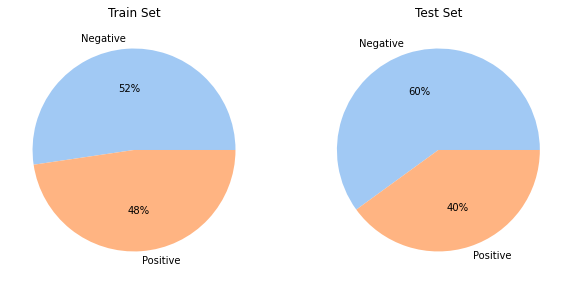

In [33]:
fig, axs=plt.subplots(nrows=1, ncols =2, figsize= (10,8))
axs[0].pie(y_train.value_counts(), labels = ["Negative", "Positive"], colors = colors, autopct='%.0f%%')
axs[1].pie(y_test.value_counts(), labels = ["Negative", "Positive"], colors = colors, autopct='%.0f%%')
axs[0].set_title('Train Set')
axs[1].set_title('Test Set')
plt.show()

The above pie chart shows us that the problem is a balanced classfification problem because there is no a huge difference between the number of sample in each classes 

However the given dataset is clean and dose not need any cleaning process, but to make sure that there is no Null-value in dataset we can double check ```df.info()```    

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    float64
 2   cp        297 non-null    float64
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    float64
 6   restecg   297 non-null    float64
 7   thalach   297 non-null    float64
 8   exang     297 non-null    float64
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    float64
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
 13  target    297 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 32.6 KB


Sometimes it is noteworthy to ask some question and investigate the data to have a better understanding of it. for example what is the percentage of women and men with and without disease

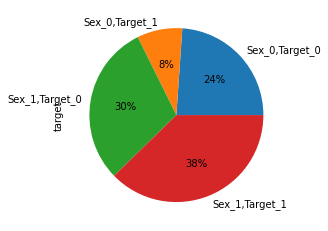

In [10]:
df.groupby(by=['sex','target']).target.count().plot.pie(autopct='%.0f%%', labels = ['Sex_0,Target_0','Sex_0,Target_1','Sex_1,Target_0','Sex_1,Target_1'])
plt.show()

In [ ]:
Many mochine learning model 

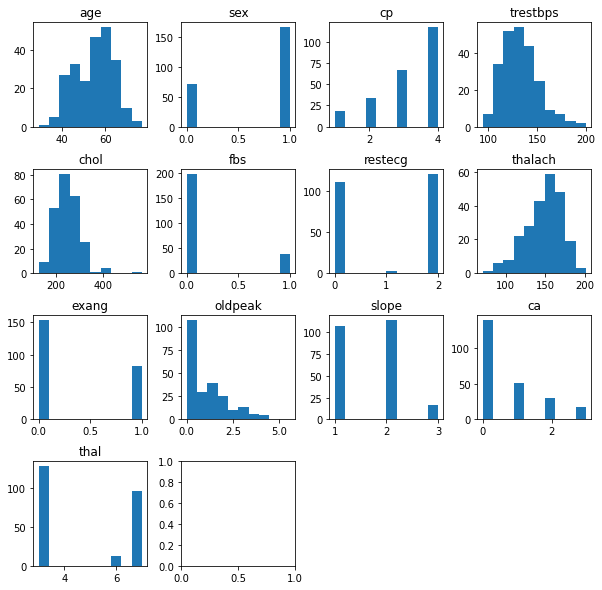

In [11]:
fig , axs = plt.subplots(nrows=4,ncols=4,figsize =(10,10))
plt.subplots_adjust(wspace=.3,hspace=0.4)
axs = axs.ravel()

for idx_col , col in enumerate(df.columns[:-1]):
    axs[idx_col].hist(X_train.iloc[:,idx_col])
    axs[idx_col].set_title(col)
        
axs[14].axis('off')
axs[15].axis('off')
    
plt.show()

It can be seen that data Distribution is totaly different for different features . So we need some sort of normalization to have all features in the same range. We have two options for Normalization:

- __MinMax Normalization__ is one of the most common ways to normalize data. For every feature, the minimum value of that featur is transformed into 0 and the maximum value will be mapped into 1, and every other value gets transformed into a decimal between 0 and 1.

- __Standard Normalization__ which map data point to a normal distribution with mean zero and dtandard deviation 1

Here I've used both of them and compared the result. 

### Data Preprocessing

In [12]:
def scaler(X_train , X_test , t):
    if t == 'MinMax':
        minmax = MinMaxScaler()
        X_train = minmax.fit_transform(X_train)
        X_test = minmax.transform(X_test)
    elif t == 'StandardScaler':
        sdscaler= StandardScaler()
        X_train = sdscaler.fit_transform(X_train)
        X_test = sdscaler.transform(X_test)
    else:
        raise ValueError('invalid value for "t", should be either "MinMax" or "StandardScaler" ')
    return X_train,X_test

In [13]:
X_train,X_test  = scaler(X_train , X_test , 'MinMax')

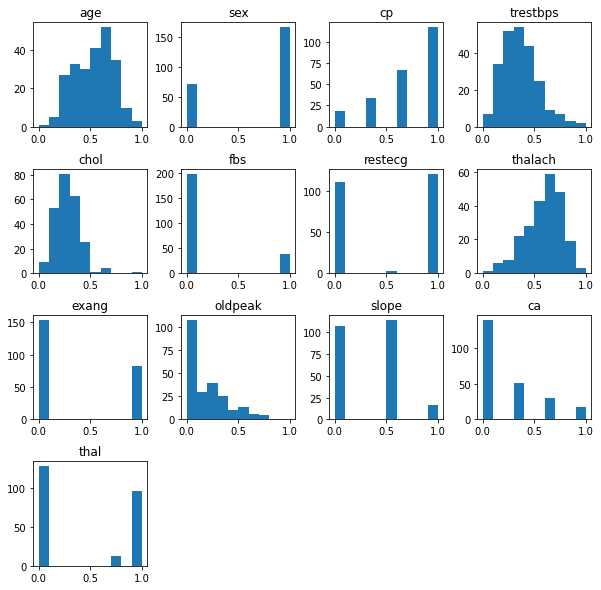

In [14]:
fig , axs = plt.subplots(nrows=4,ncols=4,figsize =(10,10))
plt.subplots_adjust(wspace=.3,hspace=0.4)
axs = axs.ravel()

for idx_col , col in enumerate(df.columns[:-1]):
    axs[idx_col].hist(X_train[:,idx_col])
    axs[idx_col].set_title(col)
    
axs[13].axis('off')
axs[14].axis('off')
axs[15].axis('off')
    
plt.show()

In [16]:
lr_set =[0.1, .01, .001]
optim_set = ['sgd', 'adam']
hidden_set =[10, 20, 30]
activ_set = ['relu', 'logistic']
reg_set =[0, 0.1, 0.001]

mlp = MLPClassifier()
grid = GridSearchCV(mlp, param_grid={
                        'hidden_layer_sizes' : hidden_set,
                        'activation': activ_set,
                        'solver':optim_set,
                        'alpha':reg_set,
                        'learning_rate_init' : lr_set} , n_jobs = -1)

grid.fit(X_train, y_train)

GridSearchCV(estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0, 0.1, 0.001],
                         'hidden_layer_sizes': [10, 20, 30],
                         'learning_rate_init': [0.1, 0.01, 0.001],
                         'solver': ['sgd', 'adam']})

In [28]:
print('Best Parameters for MLP')
print('='*30)
print('\n'.join([f'{key}:{val}' for key, val in grid.best_params_.items()]))

Best Parameters for MLP
activation:logistic
alpha:0.001
hidden_layer_sizes:30
learning_rate_init:0.01
solver:adam


In [31]:
best_model = grid.best_estimator_
test_predicted = best_model.predict(X_test)

train_acc = accuracy_score(y_train, grid.predict(X_train))
test_acc = accuracy_score(y_test, grid.predict(X_test))

print('Best Parameters for MLP')
print('='*30)
print(f'Accuracy on test data: {test_acc:.2f}')
print(f'Accuracy on train data: {train_acc:.2f}')

Best Parameters for MLP
Accuracy on test data: 0.85
Accuracy on train data: 0.85


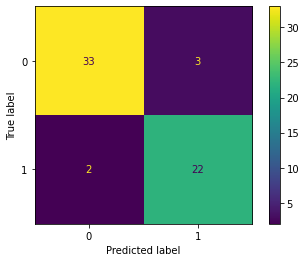

In [136]:
plot_confusion_matrix(best_model, X_test,y_test)
plt.show()

# Decision Tree


In [11]:
from sklearn.tree import DecisionTreeClassifier


In [13]:
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [15]:
predicted_train = tree.predict(X_train)
predicted_test = tree.predict(X_test)
test_acc = accuracy_score(predicted_test, y_test)
train_acc = accuracy_score(predicted_train, y_train)

In [18]:
print(f'Accuracy on test data: {test_acc}')
print(f'Accuracy on train data: {train_acc}')

Accuracy on test data: 0.75
Accuracy on train data: 1.0


> As the Decision Tree doesn’t perform any pruning by default, it allows the tree to grow as much as it can. Here we got 0.75 and 1 on the test and train part respectively and this means that the model is probabely Overfitted and has memorized the train data. so it's not able to perform equally well on the test data.

# Prunning the tree

In [52]:
path = tree.cost_complexity_pruning_path(X_train, y_train)
alphas = path['ccp_alphas']

accuracy_history=pd.DataFrame({'tree':[],'alpha':[], 'train_acc':[], 'test_acc':[]})

for alpha in alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha)
    tree.fit(X_train, y_train)
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    acc_train = accuracy_score(pred_train, y_train)
    acc_test = accuracy_score(pred_test, y_test)
    
    
    accuracy_history= accuracy_history.append({'tree':tree, 'alpha': alpha, 'train_acc':acc_train,'test_acc':acc_test},ignore_index=True)

In [53]:
accuracy_history

,tree,alpha,train_acc,test_acc
0,DecisionTreeClassifier(),0.000000,1.000000,0.816667
1,DecisionTreeClassifier(ccp_alpha=0.00276605719...,0.002766,0.995781,0.783333
2,DecisionTreeClassifier(ccp_alpha=0.00361663652...,0.003617,0.987342,0.766667
3,DecisionTreeClassifier(ccp_alpha=0.00389483933...,0.003895,0.978903,0.783333
4,DecisionTreeClassifier(ccp_alpha=0.00401751281...,0.004018,0.978903,0.833333
5,DecisionTreeClassifier(ccp_alpha=0.00543834974...,0.005438,0.970464,0.816667
6,DecisionTreeClassifier(ccp_alpha=0.00562587904...,0.005626,0.936709,0.816667
7,DecisionTreeClassifier(ccp_alpha=0.00562587904...,0.005626,0.936709,0.816667
8,DecisionTreeClassifier(ccp_alpha=0.00562587904...,0.005626,0.919831,0.800000
9,DecisionTreeClassifier(ccp_alpha=0.00562587904...,0.005626,0.919831,0.800000


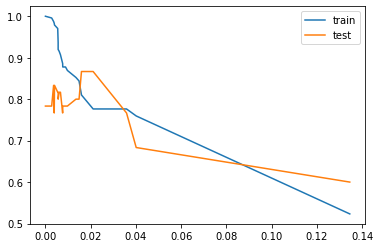

In [47]:
plt.plot(accuracy_history.alpha,accuracy_history.train_acc)
plt.plot(accuracy_history.alpha, accuracy_history.test_acc)
plt.legend(['train', 'test'])
plt.show()

> As can be seen in the above plot, for $\alpha \in [0.02, 0.03]$ we get the maximum test accuracy. Although our train accuracy has decreased to 0.8, the tree is now more generalized and it performs better on unseen test data.

In [54]:
best = accuracy_history.iloc[accuracy_history.test_acc.argmax(),:]

print(f'Accuracy on test data: {best.test_acc}')
print(f'Accuracy on train data: {best.train_acc}')

Accuracy on test data: 0.8666666666666667
Accuracy on train data: 0.810126582278481


In [169]:
plot_confusion_matrix(best.tree, X_test,y_test)
plt.title('Decision Tree')
plt.show()

NameError: name 'best' is not defined

# Random Forest

In [165]:
from sklearn.ensemble import RandomForestClassifier

In [187]:
rcf = RandomForestClassifier(random_state=1)
grid= GridSearchCV(rfc,{'criterion':['gini', 'entropy'],'n_estimators': range(50, 401, 50)}, verbose=True, cv =5, n_jobs=-1)

In [168]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    7.1s finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(50, 401, 50)},
             verbose=True)

In [135]:
grid.best_params_

{'criterion': 'entropy', 'n_estimators': 300}

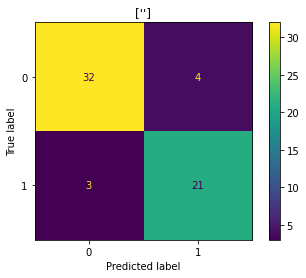

In [136]:
plot_confusion_matrix(grid.best_estimator_, X_test,y_test)
plt.title([''])
plt.show()

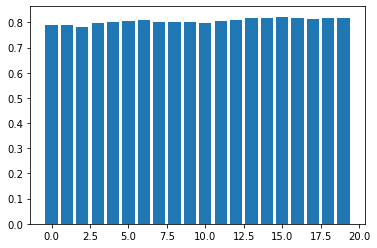

In [152]:
plt.bar(range(len( grid.cv_results_['mean_test_score'])), grid.cv_results_['mean_test_score'])
plt.show()

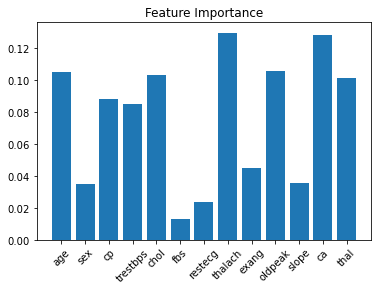

In [153]:
plt.bar(range(len(grid.best_estimator_.feature_importances_)) , grid.best_estimator_.feature_importances_)
plt.xticks(range(len(grid.best_estimator_.feature_importances_)), df.columns[:-1] , rotation = 45)
plt.title('Feature Importance')
plt.show()

In [157]:
train_acc = accuracy_score(y_train, grid.predict(X_train))
test_acc = accuracy_score(y_test, grid.predict(X_test))

print('Random Forest Performance')
print(f'Accuracy on test data: {test_acc:.2f}')
print(f'Accuracy on train data: {train_acc:.2f}')

Random Forest Performance
Accuracy on test data: 0.88
Accuracy on train data: 1.00
